### 사용할 라이브러리(패키지)

In [1]:
### 전처리 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
### 머신러닝에서 사용하는 라이브러리
# 교차검증
from sklearn.model_selection import cross_validate
# 특성중요도
from sklearn.inspection import permutation_importance
# 사용할 분류 모델
from sklearn.ensemble import RandomForestClassifier

In [3]:
### 훈련모델 평가를 위한 라이브러리
# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1_score
from sklearn.metrics import f1_score

In [4]:
### 예측 정확도 평가를 위한 라이브러리
# 혼동행렬 시각화
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
### 한글폰트 설정
plt.rc("font", family="Malgun Gothic")

### 마이너스(-) 기호 표시 설정
plt.rcParams["axes.unicode_minus"] = False

### 데이터 읽어들이기

In [6]:
### 데이터프레임 변수명 : df_data
# 사용할 데이터 : final_df.csv
file_path = "./data/final_df.csv"
df_data = pd.read_csv(file_path)
df_data.info()
df_data.head(1)

### 독립변수
# pH : 수소이온 농도 지수
# Temp : 온도
# Voltage : 전압

### 종속변수
# QC : 품질 측정값(0 or 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pH       50094 non-null  float64
 1   Temp     50094 non-null  float64
 2   Voltage  50094 non-null  float64
 3   QC       50094 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1.5 MB


,pH,Temp,Voltage,QC
0,2.15,43.15,19.74,0


### 데이터 분류하기

In [7]:
### 독립변수 : data 변수 사용, numpy 배열로 변환
### 종속변수 : target 변수 사용, numpy 배열로 변환

data = df_data[["pH", "Temp", "Voltage"]].to_numpy()
target = df_data["QC"].to_numpy()

data.shape, target.shape

((50094, 3), (50094,))

In [10]:
### 훈련데이터와 테스트데이터로 분리하기 (8:2)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(40075, 3) (40075,)
(10019, 3) (10019,)


### 데이터 스케일링(데이터 정규화 및 표준화 )

In [ ]:
"""
[데이터 스케일링]
 - 서로 다른 변수의 값 범위(단위)를 일정한 수준으로 맞추는 작업
 - 수치형 변수(컬럼)에만 적용됨
 - 스케일링 방법 3가지
   StandardScaler(정규화), MinMaxScaler(표준화), RobustScaler(로버스트)

<표준화 스케일링방법(StandardScaler)>
 - 변수 x의 원래 값에서 x의 평균(mean)을 뺀 값을,
   x의 표준편차(stdev)로 나눈 값으로 계산 됨
 - 산술식 = (x - mean(x)) / stdev(x)
 - 주로 분류에서 사용되는 방법
 
<정규화 스케일링방법(MinMaxScaler)>
 - 서로 다른 변수의 크기(단위)를 통일하기 위해 크기를 변환해주는 방법
 - 정규화를 통해 변수들이 평등하게 0~1 사이의 값을 가짐
 - 모델은 어느 특정 변수에 중점을 두기보다는 변수들을 평등하게 바라보고 학습
 - 회귀에서 주로 사용되는 방법
 - 변수 x의 원래 값에서 x의 최소값(min)을 뺀 값을,
   x의 최대값(max)과 최소값(min)의 차이로 나눈 값으로 계산
 - 산술식 = (x - min(x)) / (max(x) - min(x))

<로버스트 스케일링방법(RobustScaler)>
 - 데이터의 중앙값 = 0, IQR =1이 되도록 스케일하는 기법
 - 모든 변수들이 같은 스케일을 갖게 됨
 - StandardScaler에 비해 스케일링 결과가 더 넓은 범위로 분포하게 됨
 - 따라서, StandardScaler에 비해 "이상치"의 영향이 적어진다는 장점이 있음
 - 변수 x의 원래 값에서 x의 중앙값(mean)을 뺀 값을,
   x의 3분위수(q3)와 1분위수(q1)의 차이(IQR)로 나눈 값으로 계산
 - 산술식 = (x - mean(x)) / (q3 - q1)
 - 분류 및 회귀 모두 사용가능
"""

In [12]:
### 표준화 스케일링 방법
# 사용 라이브러리
from sklearn.preprocessing import StandardScaler

# 객체 생성
ss = StandardScaler()

# 훈련-독립변수 데이터 표준화 : 모델이 스스로 데이터 형성
ss.fit(train_input)

# 훈련 및 테스트 독립변수 데이터를 변환하기
train_std_scaler = ss.transform(train_input)
test_std_scaler  = ss.transform(test_input)

train_std_scaler.shape, test_std_scaler.shape

((40075, 3), (10019, 3))

In [14]:
### 정규화 스케일링 방법
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(train_input)
train_mm_scaler = mm.transform(train_input)
test_mm_scaler  = mm.transform(test_input)

train_mm_scaler.shape, test_mm_scaler.shape

((40075, 3), (10019, 3))

In [16]:
### 로버스트 스케일러 방법
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
rs.fit(train_input)
train_rs_scaler = rs.transform(train_input)
test_rs_scaler  = rs.transform(test_input)

train_rs_scaler.shape, test_rs_scaler.shape

((40075, 3), (10019, 3))

### 훈련하기

In [19]:
### 램덤포레스트 사용
# n_jobs : -1은 cpu의 모든 코어 사용 
# 클래스(모델) 생성
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [20]:
### 훈련시키기
# 종속변수는 스케일링을 하면 안됨 : 정답 그대로 사용
rf.fit(train_std_scaler, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
###  훈련 정확도와 테스트 정확도 확인하기
train_score = rf.score(train_std_scaler, train_target)
test_score  = rf.score(test_std_scaler, test_target)

train_score, test_score

### 해석
# - 과소적합이 일어나지 않았으며,
# - 0.01 정도의 차이로 
# - 성능이 매우 좋은 모델로 해석 할 수 있음

(0.999825327510917, 0.9871244635193133)

### 예측 하기

In [22]:
y_perd = rf.predict(test_std_scaler)
y_perd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 예측 평가하기

In [ ]:
"""
<예측 평가 방법>
 - 정확도, 정밀도, 재현율, f1-스코어를 이용해서 평가함
 - 예측에 오류가 있는지 확인 : 오차행렬(혼동행렬) 시각화를 통해 확인
"""

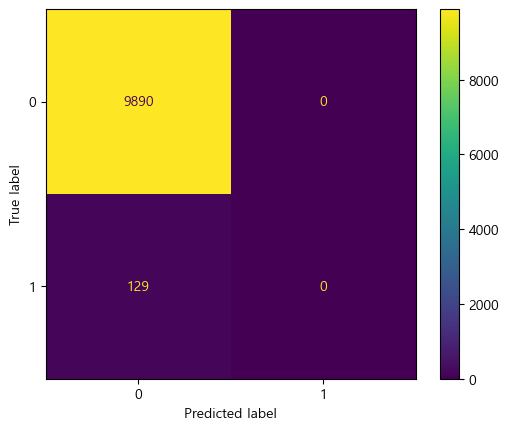

In [23]:
### 오차행렬(혼동행렬) 시각화 (예측 결과를 이용해 오류 해석 가능)
# 오차 평가 매트릭스
cm = confusion_matrix(test_target, y_perd, labels=rf.classes_)

# 오차 행렬도 데이터 생성
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=rf.classes_)

# 오차 행렬도 그리기
disp.plot()


### <오차행렬(혼동행렬) 해석 방법>
# - x축은 예측값, y축은 실제값 

In [ ]:
"""
<오차행렬(혼동행렬) 시각화>
 - 어떠 유형의 예측 오류가 발생하고 있는지를 나타내는 자료로 사용됨
 - 분류 문제에서는 반드시 오차행렬(혼동행렬) 매트릭스를 출력해서 결과를 
   해석하고 설명가능해야 함(정확도의 수치를 믿어서는 안됨)

<오차행렬(혼동행렬) 해석 방법>
 - 실제 종속변수값과 예측결과값을 이용
 - 실제 종속변수값이 Positive(긍정)인지, Negative(부정)인지와
   예측값이 Positive(긍정)인지, Negative(부정)인지를 나타냄
   
<오차행렬(혼동행렬) 시각화 설명>
 - T는 True를 의미하며, F는 False를 의미함
   -> True는 예측값과 실제값이 같은 것 (잘 맞춘것)
   -> False는 에측값과 실제값이 다른 것 (잘못 맞춘것)
 - P는 Positive를 의미하며, N은 Negative를 의미함
   -> 예측값을 기준으로 부정(0), 긍정(1)을 의미함

<오류 영역 - 예측을 기준으로 P(긍정) or N(부정)을 지정>
 - False(예측값과 실제값이 다른경우) 이면서, P(긍정)인 경우
   -> FP : 예측 결과가 맞지는 않지만, P은 긍정적 오류로 해석
         : 위험하지는 않은 오류로 해석 가능

 - False 이면서, N(부정) 인경우
   -> FN : 예측 결과가 맞지는 않지만, N은 부정적 오류로 해석
         : 매우 위험한 오류로 해석 가능

"""

In [25]:
### 정확도 확인하기
acc = accuracy_score(test_target, y_perd)

### 정밀도
pre = precision_score(test_target, y_perd, zero_division=0)

### 재현율
rec = recall_score(test_target, y_perd)

### f1-스코어
f1 = f1_score(test_target, y_perd)

acc, pre, rec, f1

### 모든 score의 결과값은 0 ~ 1사이의 값
# - 1에 가까울 수록 좋음 : 훈련모델이 좋다라고 판단할 수 있는 지표값
# - 0에 가까울 수록 안좋음
# - 기본 적으로 재현율(recall)의 값이 높을 수록 좋은 모델로 판단함
#   (위 4개의 score 중에 재현율만 확인해도 됨)

(0.9871244635193133, 0.0, 0.0, 0.0)

In [ ]:
"""
<정확도(Accuracy)>
 - 올바르게 예측된 데이터의 수를, 전체 데이터의 수로 나눈 값
 - 예측이 정답과 얼마나 정확한가를 의미
 - 산술식 = (TP + TN) / (TP + TN + FP + FN)
 
<정밀도(Precision)>
 - 모델이 True로 예측한 데이터 중에 실제로 True인 데이터
 - 산술식 = TP / (TP + FP)
 
<재현율(Recall)>
 - 실제로 True인 데이터를 True라고 인식한 데이터 수
 - 위험한 오류 영역이 포함됨
 - 산술식 = TP / (TP + FN)
 
<F1-스코어(f1_score)>
 - Precision(정밀도)과 Recall(재현율)을 조합하여 하나의 통계치를 반환함
 - 정밀도와 재현율의 평균이라고 생각하시면 됨
 - F1스코어 값이 높으면, 성능이 높은 모델이라고 판단 할 수 있음
 - 산술식 = (정밀도 * 재현율) / (정밀도 + 재현율)
 
<최종 모델 판단 방법>
 - 우선 재현율이 높아야함
 - 그리고 F1 스코어 값이 높으면 
 - 좋은 모델로 판단
"""

### 하이퍼파라메터 튜닝 

In [ ]:
### 하이퍼파라메터 
# - 모델 생성 시 사용되는 속성값들 중 사람이 직접 입력해야하는 값들을
#   하이퍼파라메터라고 칭합니다.

### 앙상블 모델은 트리 기반으로 되어 있기에
# - 트리 기반의 튜닝이 진행됨

### 기본적인 튜닝을 위한 하이퍼파라메터
# - 트리갯수, 최대깊이, 분리노드의 최소자료수, 잎사귀노드의 최소자료수

##### 1. 트리의 갯수 찾기

In [ ]:
### 트리의 갯수값을 일정 범위 값으로하여 반복하면서 정확도를 비교 선택함

# 트리의 갯수별로 훈련 및 테스트 정확도를 저장할 변수 지정
train_score = []
test_score  = []

# 트리의 갯수 범위 임의로 지정
n_estimator_min = 1
n_estimator_max = 30

# 트리의 갯수를 5씩 증가된 30개 만들기
param_n_tree = [n_tree * 5 for n_tree in range(n_estimator_min, 
                                               n_estimator_max)]
# print(param_n_tree)
### param_n_tree 각각의 값은 사용할 트리 갯수
# - param_n_tree의 리스트 갯수만큼 반복하면서 정확도 확인하기
for v_n_estimators in param_n_tree :
    # 훈련모델 생성 시 사용할 트리의 갯수 : n_estimators
    model = RandomForestClassifier(n_estimators=v_n_estimators,
                                   random_state=42)
    # 훈련 시키기
    model.fit(train_std_scaler, train_target)
    
    # 훈련 및 테스트 정확도 리스트 변수에 담기
    tr_score = model.score(train_std_scaler, train_target)
    te_score = model.score(test_std_scaler, test_target)
    train_score.append(tr_score)
    test_score.append(te_score)
    
    print("훈련정확도 : 테스트정확도 = {} : {}".format(tr_score,
                                                      te_score))
    

훈련정확도 : 테스트정확도 = 0.996756082345602 : 0.9862261702764747
훈련정확도 : 테스트정확도 = 0.9967311291328759 : 0.9872242738796287
훈련정확도 : 테스트정확도 = 0.9985527136618839 : 0.9869248427986825
훈련정확도 : 테스트정확도 = 0.9985277604491578 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9993013100436681 : 0.9869248427986825
훈련정확도 : 테스트정확도 = 0.9991765439800374 : 0.9869248427986825
훈련정확도 : 테스트정확도 = 0.9995508421709295 : 0.9869248427986825
훈련정확도 : 테스트정확도 = 0.9994510293200249 : 0.9869248427986825
훈련정확도 : 테스트정확도 = 0.9997504678727386 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9996007485963818 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.999650655021834 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9997255146600125 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9997754210854648 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9997754210854648 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9998502807236431 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.999825327510917 : 0.9870246531589979
훈련정확도 : 테스트정확도 = 0.9999001871490955 : 0.9872242738796287
훈련정확도 : 테스트정확도 = 0.999875233936369